In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def hypothesis(x, theta):
    return np.dot(x, theta)
     

In [7]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [8]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [9]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 1000):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [11]:
raw = pd.read_csv('prices-split-adjusted.csv');

In [15]:
raw.drop(columns = ['date', 'symbol'])

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000,973800.0
851260,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,44.730000,45.450001,44.410000,45.590000,1380900.0


In [60]:
data = raw.values
data

array([['2016-01-05', 'WLTW', 123.43, ..., 122.309998, 126.25, 2163600.0],
       ['2016-01-06', 'WLTW', 125.239998, ..., 119.940002, 125.540001,
        2386400.0],
       ['2016-01-07', 'WLTW', 116.379997, ..., 114.93, 119.739998,
        2489500.0],
       ...,
       ['2016-12-30', 'ZTS', 53.639999, ..., 53.27, 53.740002, 1701200.0],
       ['2016-12-30', 'AIV', 44.73, ..., 44.41, 45.59, 1380900.0],
       ['2016-12-30', 'FTV', 54.200001, ..., 53.389999, 54.48, 705100.0]],
      dtype=object)

In [66]:
X = np.array(X, dtype = np.float64)

In [67]:
X = data[:, [2, 4, 5, 6]]
Y = data[:, 3]

In [68]:
X = np.array(X, dtype = np.float64)
X_mean = np.mean(X, axis = 0)

In [69]:
X_std = np.std(X, axis = 0)

In [70]:
X = (X - X_mean)/X_std

In [71]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
X[:4, :]

array([[ 1.        ,  0.77703978,  0.77859074,  0.79848234, -0.26023189],
       [ 1.        ,  0.80110767,  0.7467614 ,  0.78912878, -0.24240029],
       [ 1.        ,  0.68329454,  0.67947645,  0.71271927, -0.23414878],
       [ 1.        ,  0.67132715,  0.66027137,  0.68241901, -0.27282125]])

In [72]:
theta, cost_epoch = gradient_descent(X, Y, learning_rate=0.1, max_steps = 200)

In [73]:
theta

array([65.01191269635413, 24.97426590807874, 25.114071362586305,
       25.108846990932022, -0.006658709920044071], dtype=object)

In [78]:
cost_epoch[-10:]


[0.8046262907290405,
 0.8046199509827842,
 0.8046136113249576,
 0.8046072717555858,
 0.8046009322747143,
 0.8045945928822623,
 0.8045882535783201,
 0.8045819143627665,
 0.804575575235681,
 0.8045692361970563]

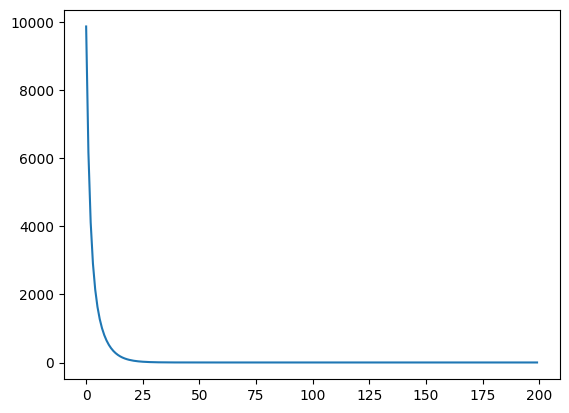

In [75]:
plt.plot(cost_epoch)
plt.show()

In [80]:
# R2 score, and other scores/errors check
# Train test split also check